#### Shriyansh Singh
#### CECS 406 Section 01

# Multiclass Classification
- Classifying news wires by topic

In [ ]:
# Loading the Reuters dataset
from keras.api.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
# Finding out training examples and test examples
print("Train data:", len(train_data))
print("Test data:", len(test_data))

Train data: 8982
Test data: 2246


In [ ]:
# List of integer(word indices)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_labels[10]

3

In [ ]:
# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)
# Vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1

    return results

# Vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting apart 1,000 samples in the training data to use as a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Training the network for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.3370 - loss: 3.2565 - val_accuracy: 0.6230 - val_loss: 1.9616
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6652 - loss: 1.7712 - val_accuracy: 0.6820 - val_loss: 1.4727
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.7199 - loss: 1.3125 - val_accuracy: 0.7260 - val_loss: 1.2543
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7748 - loss: 1.0541 - val_accuracy: 0.7540 - val_loss: 1.1237
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.8174 - loss: 0.8517 - val_accuracy: 0.7630 - val_loss: 1.0529
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.8520 - loss: 0.7151 - val_accuracy: 0.7810 - val_loss: 0.9892
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8736 - loss: 0.6055 - val_accuracy: 0.7980 - val_loss: 0.9385
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8884 - loss: 0.5303 - val_accuracy: 0.8080

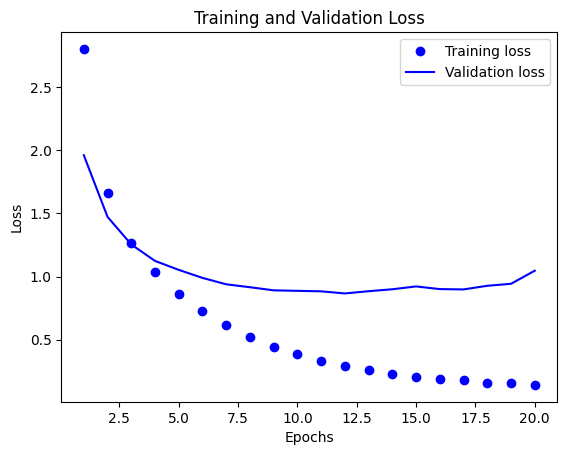

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

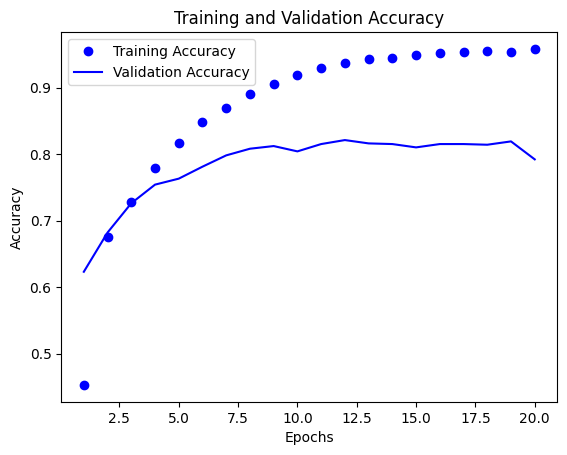

In [ ]:
# Plotting the training and validation accuracy
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Retraining a model from Scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.4119 - loss: 3.1176 - val_accuracy: 0.6350 - val_loss: 1.7886
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6801 - loss: 1.5859 - val_accuracy: 0.7030 - val_loss: 1.3868
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7226 - loss: 1.2420 - val_accuracy: 0.7250 - val_loss: 1.1896
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7808 - loss: 0.9736 - val_accuracy: 0.7690 - val_loss: 1.0706
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8223 - loss: 0.8109 - val_accuracy: 0.7940 - val_loss: 0.9869
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8634 - loss: 0.6568 - val_accuracy: 0.8080 - val_loss: 0.9369
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8854 - loss: 0.5553 - val_accuracy: 0.8050 - val_loss: 0.9168
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9083 - loss: 0.4492 - val_accuracy: 0.8090 - val_loss:

In [ ]:
# Final results
results # --> Accuracy ~80%

[0.9339770078659058, 0.7876224517822266]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17764915405164738

In [ ]:
# Generating predictions for new data
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
# Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [ ]:
# Coefficients in this vector sum to 1
np.sum(predictions[0])

0.9999999

In [ ]:
# Largest entry is the predicted class--the class with the highest probability
np.argmax(predictions[0])

3

In [ ]:
# Encoding the labels
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
# Training the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2821 - loss: 3.3850 - val_accuracy: 0.5090 - val_loss: 2.2932
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5539 - loss: 2.0070 - val_accuracy: 0.5870 - val_loss: 1.6691
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6064 - loss: 1.4880 - val_accuracy: 0.6540 - val_loss: 1.4733
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7037 - loss: 1.2420 - val_accuracy: 0.6830 - val_loss: 1.3847
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7397 - loss: 1.0717 - val_accuracy: 0.6880 - val_loss: 1.3446
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7613 - loss: 0.9679 - val_accuracy: 0.6960 - val_loss: 1.3184
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7737 - loss: 0.8855 - val_accuracy: 0.7060 - val_loss: 1.2871
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7919 - loss: 0.8363 - val_accuracy: 0.7070 - v

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 1.7476


In [ ]:
# Final results
results # --> Accuracy ~70%

[1.8230961561203003, 0.7021371126174927]